**Part A: Regression on California test scores**
1. Find the url for the California Test Score Data Set from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.html. Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv.The target data (i.e. the dependent variable) is named "testscr". You can use all variables in the data except for "readscr" and "mathscr" in the following analysis (those two variables were used to generate the dependent variable).

2. Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

3. Visualize the dependency of the target on each feature you just plotted.

4. Split the data into training and test sets. Build models that evaluate the relationship between all available quantitative X variables in the California test dataset and the target variable. Evaluate KNN (for regression), Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. How different are the results?

5. Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?

6. Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

7. Compare the coefficients of your two best linear models (not KNN). Do they agree on which features are important?

8. Discuss which final model you would choose to predict new data.

### 1. Variable selection
* Dependent Variable (Target Data): testscr
* Independent Variables: expnstu, avginc, compstu
  * Reason for choosing these variables:
  After testing all relationships through scatterplot between possible independent variables and our target data, these 3 variables showed a comparatively strong relationship with our target data


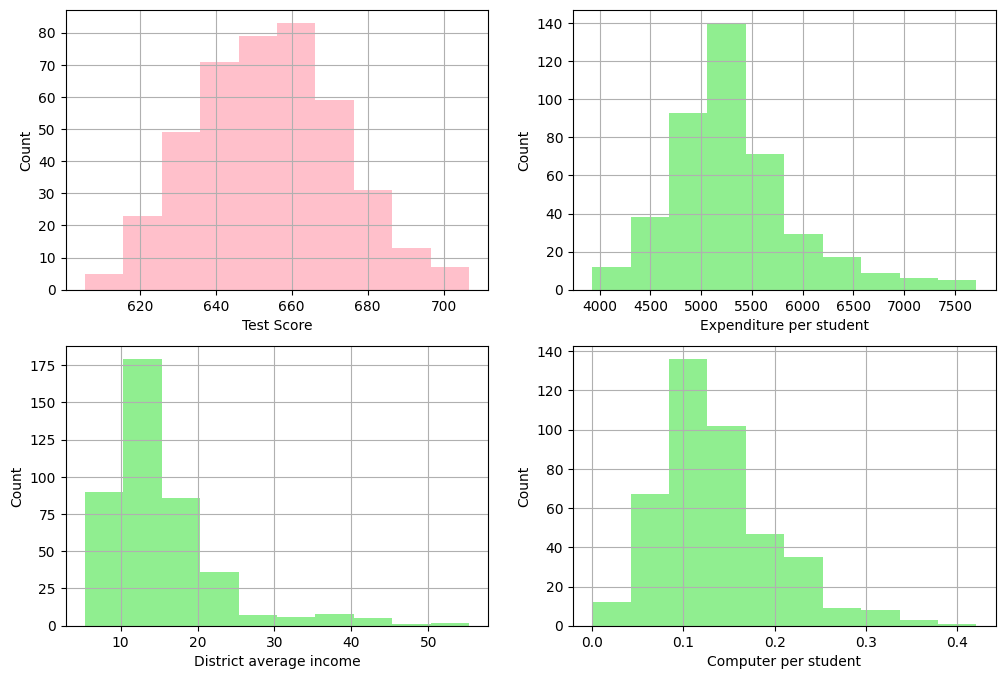

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv", encoding = "latin_1")

variables = ['testscr', 'expnstu', 'avginc', 'compstu']
var_names = ['Test Score', 'Expenditure per student', 'District average income', 'Computer per student']
plt.figure(figsize=(12, 8))
for i, name in enumerate(variables):
  plt.subplot(2, 2, i+1)
  if i == 0:
    df[name].hist(color = 'pink')
  else:
    df[name].hist(color = 'lightgreen')
  plt.xlabel(var_names[i])
  plt.ylabel('Count')

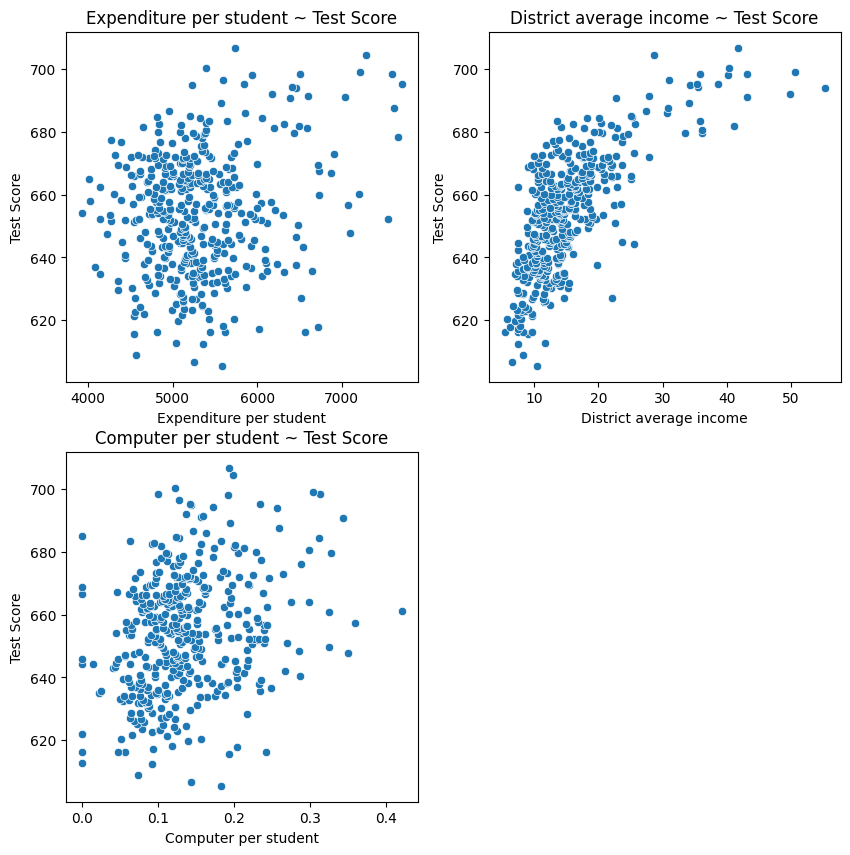

In [2]:
plt.figure(figsize=(10, 10))
variables = ['expnstu', 'avginc', 'compstu']
var_names = ['Expenditure per student', 'District average income', 'Computer per student']
for i, name in enumerate(variables):
  plt.subplot(2, 2, i+1)
  # Must includes "x ="" and "y =""
  sns.scatterplot(x=df[name], y=df['testscr'])
  plt.title(f'{var_names[i]} ~ Test Score')
  plt.xlabel(var_names[i])
  plt.ylabel('Test Score')

### 2. Applying KNN, Linear Regression, Ridge, Lasso and figure out the score with "StandardScaler"
* Compare different scores:
 * KNN: 0.47
 * LinearRregressionScore: 0.51
 * RidgeRregressionScore: 0.51
 * LassoRregressionScore: 0.50
* Except for the KNN score, other scores are approximate to 0.51. It means except KNN model, other regression models can explain nearly 51% of the variation of our target value.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statistics import mean
import numpy as np

y = df['testscr']
X = df.loc[:, ['expnstu', 'avginc', 'compstu']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# If you want to set parameters, you should set them inside the pipeline
# also, pipeline will automatically apply fit and transform methods inside StandardScaler()
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())]),
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'RidgeRegression': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'LassoRegression': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
}

knn_pipeline = pipelines['KNN']
knn_scores = mean(cross_val_score(knn_pipeline, X_train, y_train, cv=5))
print(f'KNNscore: {knn_scores}')

lr_pipeline = pipelines['LinearRegression']
lr_scores = mean(cross_val_score(lr_pipeline, X_train, y_train, cv=5))
print(f'LinearRregressionScore: {lr_scores}')

rg_pipeline = pipelines['RidgeRegression']
rg_scores = mean(cross_val_score(rg_pipeline, X_train, y_train, cv=5))
print(f'RidgeRregressionScore: {rg_scores}')

ls_pipeline = pipelines['LassoRegression']
ls_scores = mean(cross_val_score(ls_pipeline, X_train, y_train, cv=5))
print(f'LassoRregressionScore: {ls_scores}')

KNNscore: 0.47055824958542664
LinearRregressionScore: 0.5059266174317818
RidgeRregressionScore: 0.5059127369521531
LassoRregressionScore: 0.49584006271060266


### 3. Applying KNN, Linear Regression, Ridge, Lasso and figure out the score without "StandardScaler"
* Compare different scores:
 * KNN: -0.074
 * LinearRregressionScore: 0.529
 * RidgeRregressionScore: 0.526
 * LassoRregressionScore: 0.512
* Except for the KNN score, other scores are higher than 0.5, which is closer to the outcome when we applied "StandardScaler". However, KNN scores are extremely different in 2 cases. When we didn't apply "StandardScaler", KNN score went down to a negative value, which means this model is very bad.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statistics import mean
import numpy as np

y = df['testscr']
X = df.loc[:, ['expnstu', 'avginc', 'compstu']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipelines1 = {
    'KNN': Pipeline([('knn', KNeighborsRegressor())]),
    'LinearRegression': Pipeline([('lr', LinearRegression())]),
    'RidgeRegression': Pipeline([('ridge', Ridge())]),
    'LassoRegression': Pipeline([('lasso', Lasso())])
}

knn_pipeline = pipelines1['KNN']
knn_scores = mean(cross_val_score(knn_pipeline, X_train, y_train, cv=5))
print(f'KNNscore: {knn_scores}')

lr_pipeline = pipelines1['LinearRegression']
lr_scores = mean(cross_val_score(lr_pipeline, X_train, y_train, cv=5))
print(f'LinearRregressionScore: {lr_scores}')

rg_pipeline = pipelines1['RidgeRegression']
rg_scores = mean(cross_val_score(rg_pipeline, X_train, y_train, cv=5))
print(f'RidgeRregressionScore: {rg_scores}')

ls_pipeline = pipelines1['LassoRegression']
ls_scores = mean(cross_val_score(ls_pipeline, X_train, y_train, cv=5))
print(f'LassoRregressionScore: {ls_scores}')

KNNscore: -0.07399966859665111
LinearRregressionScore: 0.5295572322674007
RidgeRregressionScore: 0.5261713963585285
LassoRregressionScore: 0.5116059741326857


### 4. Apply "GridSearchCV" to figure out the best-performed cv
* The best mean Cross Validation scores are:
 * Best mean KNN cross-validation score: 0.5
 * Best mean Ridge cross-validation score: 0.5
 * Best mean Lasso cross-validation score: 0.5
* They are increased compared with before
* However, when I applied the tuned model to our test sets, I found the outcome was lower than before:
 * KNN test-set score: 0.401
 * Ridge test-set score: 0.436
 * Lasso test-set score: 0.439

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statistics import mean
import numpy as np

y = df['testscr']
X = df.loc[:, ['expnstu', 'avginc', 'compstu']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

param_grid = {
    'KNN':{'knn__n_neighbors': np.arange(1, 15, 2)},
    'RidgeRegression':{'ridge__alpha': np.arange(0.1, 11, 1)},
    'LassoRegression':{'lasso__alpha': np.arange(0.00001, 11, 1)}
}

pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor())]),
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'RidgeRegression': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'LassoRegression': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
}

grid_search_KNN = GridSearchCV(pipelines['KNN'], param_grid['KNN'], cv=5)
grid_search_ridge = GridSearchCV(pipelines['RidgeRegression'], param_grid['RidgeRegression'], cv=5)
grid_search_lasso = GridSearchCV(pipelines['LassoRegression'], param_grid['LassoRegression'], cv=5)

grid_search_KNN.fit(X_train, y_train)
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

print("best mean KNN cross-validation score: {:.1f}".format(grid_search_KNN.best_score_))
print("best KNN parameters: {}".format(grid_search_KNN.best_params_))
print("KNN test-set score: {:.3f}\n".format(grid_search_KNN.score(X_test, y_test)))

print("best mean Ridge cross-validation score: {:.1f}".format(grid_search_ridge.best_score_))
print("best Ridge parameters: {}".format(grid_search_ridge.best_params_))
print("Ridge test-set score: {:.3f}\n".format(grid_search_ridge.score(X_test, y_test)))

print("best mean Lasso cross-validation score: {:.1f}".format(grid_search_lasso.best_score_))
print("best Lasso parameters: {}".format(grid_search_lasso.best_params_))
print("Lasso test-set score: {:.3f}".format(grid_search_lasso.score(X_test, y_test)))

best mean KNN cross-validation score: 0.5
best KNN parameters: {'knn__n_neighbors': 13}
KNN test-set score: 0.401

best mean Ridge cross-validation score: 0.5
best Ridge parameters: {'ridge__alpha': 5.1}
Ridge test-set score: 0.436

best mean Lasso cross-validation score: 0.5
best Lasso parameters: {'lasso__alpha': 1e-05}
Lasso test-set score: 0.439


### 5. Compare coefficients between 2 best performed regression models
* Both models consider the variable 'avginc'(District average income) playing an important role in our target variable. The estimated coefficient of 'avginc' is approximately equal to 14.

In [6]:
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=13))]),
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    'RidgeRegression': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=1.1))]),
    'LassoRegression': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.00001))])
}
linear = pipelines['LinearRegression'].fit(X_train, y_train)
print(f"Linear Regression Coefficients: {linear.named_steps['lr'].coef_}")
ridge = pipelines['RidgeRegression'].fit(X_train, y_train)
print(f"Ridge Regression Coefficients: {ridge.named_steps['ridge'].coef_}")

Linear Regression Coefficients: [-1.24340402 13.98378289  2.68404104]
Ridge Regression Coefficients: [-1.21712786 13.92679408  2.67918601]


### 6. Discuss which model I would like to use
* After tuning our models, we can easily find the following outcome:
 * best mean KNN cross-validation score: 0.5
 * KNN test-set score: 0.401

 * best mean Ridge cross-validation score: 0.5
 * Ridge test-set score: 0.436

 * best mean Lasso cross-validation score: 0.5
 * Lasso test-set score: 0.439

* We can find all three models have the same best mean cross validation score, which is 0.5. However, Lasso's test score is the first among them. Therefore, Lasso model is one of the best choices. Meanwhile, Linear model also performs well in several comparisions. Aiming to decide the best model from these 2 models, in the round of "Applying KNN, Linear Regression, Ridge, Lasso and figure out the score with StandardScaler", Linear got a score 0.51 and Lasso got a score 0.50, not a huge difference. As a result, I might choose the Lasso Regression Model, which performed better in the test section.

**Part B: Classification on red and white wine characteristics**

1. First, import the red and the white wine csv files into separate pandas dataframes from the following website. Note that you’ll need to adjust the argument for read_csv() from sep=',' to sep=';'   https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csvLinks

2. Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".

3. Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

4. Split data into training and test sets. Build models that evaluate the relationship between all available quantitative X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation. How different are the results?

5. Try running your models from the previous question with and without StandardScaler. Does using StandardScaler help?

6. Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

7. Compare the coefficients for Logistic Regression and Penalized Logistic Regression. Do they agree on which features are important?

8. Discuss which final model you would choose to predict new data.

### 1. Concoct 2 data sets

In [7]:
import pandas as pd
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white_wine['winetype'] = 0
red_wine['winetype'] = 1
df = pd.concat([white_wine, red_wine])
df = df.reset_index(drop=True)
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


### 2. Visualize both dependent and independent variables

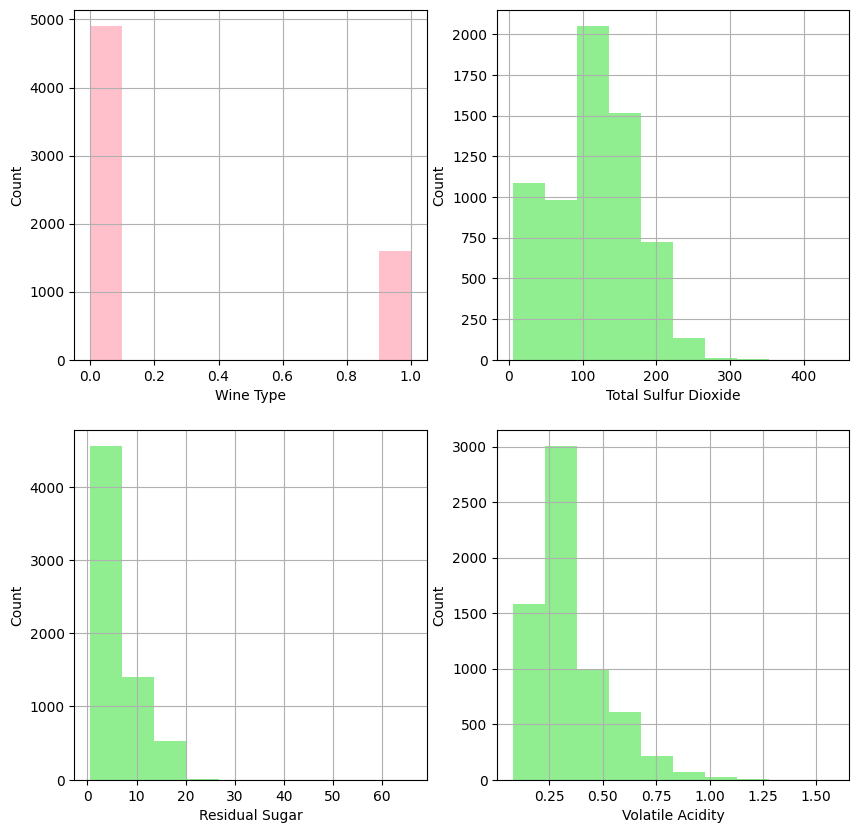

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['winetype', 'total sulfur dioxide', 'residual sugar', 'volatile acidity']
var_names = ['Wine Type' ,'Total Sulfur Dioxide', 'Residual Sugar', 'Volatile Acidity']
plt.figure(figsize=(10, 10))
for i, name in enumerate(variables):
  plt.subplot(2, 2, i+1)
  if i == 0:
    df[name].hist(color = 'pink')
  else:
    df[name].hist(color = 'lightgreen')
  plt.xlabel(var_names[i])
  plt.ylabel('Count')

### 3.  Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation with StandardScaler

* We can see scores are:
 * LogisticRegression score: 0.9559
 * Penalized Logistic Regression score: 0.9559
 * KNN score: 0.9589
* KNN model has the best score, while Logistic Regression and Penalized Logistic Regression have approximately the same score, which is 0.9559.

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statistics import mean
import numpy as np

X = df.loc[:, ['total sulfur dioxide', 'residual sugar', 'volatile acidity']]
y = df['winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipelines = {'LogisticRegression': Pipeline([('scaler', StandardScaler()),
 ('log_reg', LogisticRegression(penalty=None))]),
             'PenalizedLR': Pipeline([('scaler', StandardScaler()),
              ('penalized_lr', LogisticRegression(C=100, penalty='l2'))]),
             'KNN': Pipeline([('scaler', StandardScaler()),
              ('knn', KNeighborsClassifier())])
             }

lr_pipeline = pipelines['LogisticRegression']
lr_scores = mean(cross_val_score(lr_pipeline, X_train, y_train, cv=5))
print(f'LogisticRegression score: {lr_scores}')

penalized_lr_pipeline = pipelines['PenalizedLR']
penalized_lr_scores = mean(cross_val_score(penalized_lr_pipeline, X_train, y_train, cv=5))
print(f'Penalized Logistic Regression score: {penalized_lr_scores}')

knn_pipeline = pipelines['KNN']
knn_scores = mean(cross_val_score(knn_pipeline, X_train, y_train, cv=5))
print(f'KNN score: {knn_scores}')

LogisticRegression score: 0.9558715316169115
Penalized Logistic Regression score: 0.9558715316169115
KNN score: 0.9589490865055547


### 4.  Evaluate Logistic Regression, Penalized Logistic Regression, and KNN (for classification) using cross-validation without StandardScaler

*  Scores with StandardScaler:
 * LogisticRegression score: 0.9559
 * Penalized Logistic Regression score: 0.9559
 * KNN score: 0.9589

* Scores without StandardScaler:
 * LogisticRegression score: 0.9561
 * Penalized Logistic Regression score: 0.9561
 * KNN score: 0.9399
* Compared to the case with StandardScaler, in this case, both LogisticRegression and Penalized Logistic Regression performed better with an approximately similar score, which is 0.9561, higher than 0.9559. However, in this case， KNN model didn't perform well, whose score is 0.9399, lower than 0.9589.

In [10]:
X = df.loc[:, ['total sulfur dioxide', 'residual sugar', 'volatile acidity']]
y = df['winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipelines = {'LogisticRegression': Pipeline([('log_reg', LogisticRegression(penalty=None))]),
             'PenalizedLR': Pipeline([('penalized_lr', LogisticRegression(C=100, penalty='l2'))]),
             'KNN': Pipeline([('knn', KNeighborsClassifier())])
             }

lr_pipeline = pipelines['LogisticRegression']
lr_scores = mean(cross_val_score(lr_pipeline, X_train, y_train, cv=5))
print(f'LogisticRegression score: {lr_scores}')

penalized_lr_pipeline = pipelines['PenalizedLR']
penalized_lr_scores = mean(cross_val_score(penalized_lr_pipeline, X_train, y_train, cv=5))
print(f'Penalized Logistic Regression score: {penalized_lr_scores}')

knn_pipeline = pipelines['KNN']
knn_scores = mean(cross_val_score(knn_pipeline, X_train, y_train, cv=5))
print(f'KNN score: {knn_scores}')

LogisticRegression score: 0.9560766598220397
Penalized Logistic Regression score: 0.9560766598220397
KNN score: 0.9398607908176696


### 5.  Tune the parameters of the models where possible using GridSearchCV

* The outcome is:
 * Best mean LR corss validation score: 1.0
 * Best LR parameters: {'log_reg__C': 0.001}
 * LR test-set score: 0.954

 * Best mean PLR corss validation score: 1.0
 * Best PLR parameters: {'penalized_lr__C': 2.1}
 * PLR test-set score: 0.953

 * Best mean KNN corss validation score: 1.0
 * Best KNN parameters: {'knn__n_neighbors': 14}
 * KNN test-set score: 0.957

* As we can see, after the tuning, all best mean cross validation scores are equal to 1, which has been increased compared to before.

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np

X = df.loc[:, ['total sulfur dioxide', 'residual sugar', 'volatile acidity']]
y = df['winetype']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipelines = {'LogisticRegression': Pipeline([('scaler', StandardScaler()),
 ('log_reg', LogisticRegression(penalty=None))]),
             'PenalizedLR': Pipeline([('scaler', StandardScaler()),
              ('penalized_lr', LogisticRegression(C=100, penalty='l2'))]),
             'KNN': Pipeline([('scaler', StandardScaler()),
              ('knn', KNeighborsClassifier())])
             }

param_grid = {
    'LR': {'log_reg__C': np.arange(0.001, 10, 2)},
    'PLR': {'penalized_lr__C': np.arange(0.1, 200, 2)},
    'KNN': {'knn__n_neighbors': np.arange(1, 21, 1)}
}

grid_search_LR = GridSearchCV(pipelines['LogisticRegression'], param_grid['LR'], cv=5)
grid_search_PLR = GridSearchCV(pipelines['PenalizedLR'], param_grid['PLR'], cv=5)
grid_search_KNN = GridSearchCV(pipelines['KNN'], param_grid['KNN'], cv=5)

grid_search_LR.fit(X_train, y_train)
grid_search_PLR.fit(X_train, y_train)
grid_search_KNN.fit(X_train, y_train)

print("Best mean LR cross validation score: {:.1f}".format(grid_search_LR.best_score_))
print("Best LR parameters: {}".format(grid_search_LR.best_params_))
print("LR test-set score: {:.3f}\n".format(grid_search_LR.score(X_test, y_test)))

print("Best mean PLR cross validation score: {:.1f}".format(grid_search_PLR.best_score_))
print("Best PLR parameters: {}".format(grid_search_PLR.best_params_))
print("PLR test-set score: {:.3f}\n".format(grid_search_PLR.score(X_test, y_test)))

print("Best mean KNN cross validation score: {:.1f}".format(grid_search_KNN.best_score_))
print("Best KNN parameters: {}".format(grid_search_KNN.best_params_))
print("KNN test-set score: {:.3f}".format(grid_search_KNN.score(X_test, y_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

Best mean LR cross validation score: 1.0
Best LR parameters: {'log_reg__C': 0.001}
LR test-set score: 0.954

Best mean PLR cross validation score: 1.0
Best PLR parameters: {'penalized_lr__C': 2.1}
PLR test-set score: 0.953

Best mean KNN cross validation score: 1.0
Best KNN parameters: {'knn__n_neighbors': 14}
KNN test-set score: 0.957


### 6.  Compare the coefficients for Logistic Regression and Penalized Logistic Regression
* The outcome is:
 * Logistic Regression Coef: [-3.61540431 -0.85651594  2.26614375]
 * Penalized Logistic Regression Coef: [-3.57081401 -0.84640688  2.24114585]
* As we can see, both regression models gave the approximately same coefficients of independent variables, among which the absolute coefficient of variable('total sulfur dioxide') is the highest one. It means they agree on the importance of this variable.

In [12]:
pipelines = {'LogisticRegression': Pipeline([('scaler', StandardScaler()),
 ('log_reg', LogisticRegression(penalty=None))]),
             'PenalizedLR': Pipeline([('scaler', StandardScaler()),
              ('penalized_lr', LogisticRegression(C=2.1, penalty='l2'))]),
             'KNN': Pipeline([('scaler', StandardScaler()),
              ('knn', KNeighborsClassifier())])
             }

logistic = pipelines['LogisticRegression'].fit(X_train, y_train)
print("Logistic Regression Coef: {}".format(logistic.named_steps['log_reg'].coef_))

plogistic = pipelines['PenalizedLR'].fit(X_train, y_train)
print("Penalized Logistic Regression Coef: {}".format(plogistic.named_steps['penalized_lr'].coef_))

Logistic Regression Coef: [[-3.61540431 -0.85651594  2.26614375]]
Penalized Logistic Regression Coef: [[-3.57081401 -0.84640688  2.24114585]]


### 7. Discuss which final model you would choose to predict new data
* We can see the performance of each model after the tunning:

 * Best mean LR cross validation score: 1.0
 * LR test-set score: 0.954

 * Best mean PLR cross validation score: 1.0
 * PLR test-set score: 0.953

 * Best mean KNN cross validation score: 1.0
 * KNN test-set score: 0.957

* Among the three models, all mean of cross validation scores are 1s. However, when we tested our model with test data, KNN performed the best, and got a 0.957 score. As a result, I prefer to choose KNN model.